In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler


3. Mix énergétique en France: Quelle situation, quelle évolution ?

In [2]:
df_data_nationales = pd.read_pickle('./Pickles/df_data_nationales.pkl')

In [3]:
df_data_nationales.head()

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,,
2012-01-01 00:00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0
2012-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0
2012-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,56231.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0


In [4]:
df_data_nationales_clean = (df_data_nationales.dropna(how='all')
                                              .drop(['Ech. physiques'], axis=1)
)

In [5]:
df_data_nationales_clean = df_data_nationales_clean.dropna(how='all', axis=1)

In [6]:
df_data_nationales_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122736 entries, 2012-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Consommation  122736 non-null  float64
 1   Fioul         122736 non-null  float64
 2   Charbon       122736 non-null  float64
 3   Gaz           122736 non-null  float64
 4   Nucléaire     122736 non-null  float64
 5   Eolien        122736 non-null  float64
 6   Solaire       122736 non-null  float64
 7   Hydraulique   122736 non-null  float64
 8   Pompage       122736 non-null  float64
 9   Bioénergies   122736 non-null  float64
dtypes: float64(10)
memory usage: 10.3 MB


In [7]:
df_data_nationales2 = df_data_nationales_clean

In [8]:
df_data_nationales_clean = df_data_nationales_clean.groupby(pd.Grouper(freq="M")).sum()

In [9]:
df_data_nationales_clean.head(5)

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
DateTime,,,,,,,,,,
2012-01-31,101573076.0,893223.0,1537770.0,8150964.0,85553029.0,3170579.0,233044.0,13372457.0,-1222987.0,1039213.0
2012-02-29,108364070.0,2070743.0,5111869.0,9966798.0,77305538.0,2242160.0,404651.0,10405047.0,-835944.0,924169.0
2012-03-31,85891077.0,875593.0,2921514.0,6575791.0,75117981.0,1950245.0,665576.0,7740614.0,-876794.0,1080601.0
2012-04-30,79899382.0,705657.0,3298460.0,2813866.0,66152813.0,3137120.0,614459.0,10521234.0,-1027837.0,820778.0
2012-05-31,70077667.0,526000.0,1706754.0,1234807.0,58064275.0,1944665.0,851728.0,15256472.0,-1293309.0,943855.0


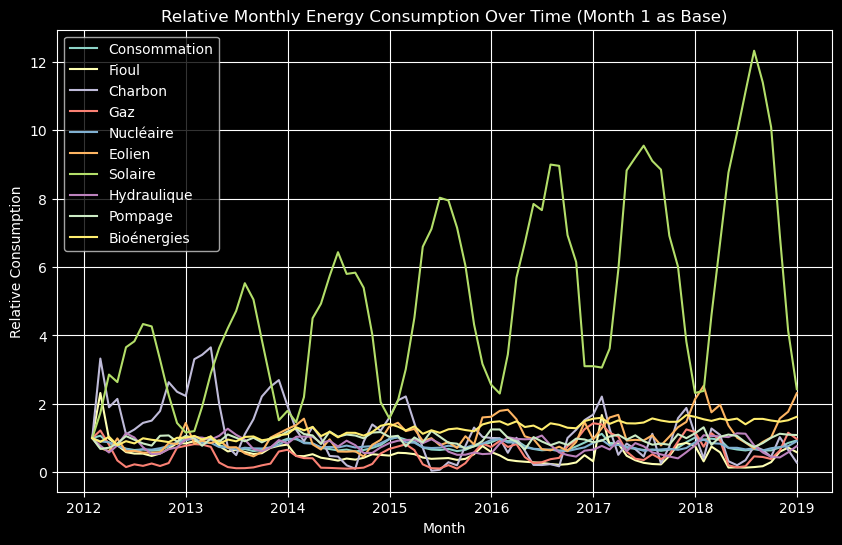

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

base_month_consumption = df_data_nationales_clean.iloc[0, :]
relative_consumption = df_data_nationales_clean.div(base_month_consumption)

plt.figure(figsize=(10, 6))

for source in relative_consumption.columns:
    plt.plot(df_data_nationales_clean.index, relative_consumption[source], label=source)

plt.title('Relative Monthly Energy Consumption Over Time (Month 1 as Base)')
plt.xlabel('Month')
plt.ylabel('Relative Consumption')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
base_month_consumption

Consommation    101573076.0
Fioul              893223.0
Charbon           1537770.0
Gaz               8150964.0
Nucléaire        85553029.0
Eolien            3170579.0
Solaire            233044.0
Hydraulique      13372457.0
Pompage          -1222987.0
Bioénergies       1039213.0
Name: 2012-01-31 00:00:00, dtype: float64

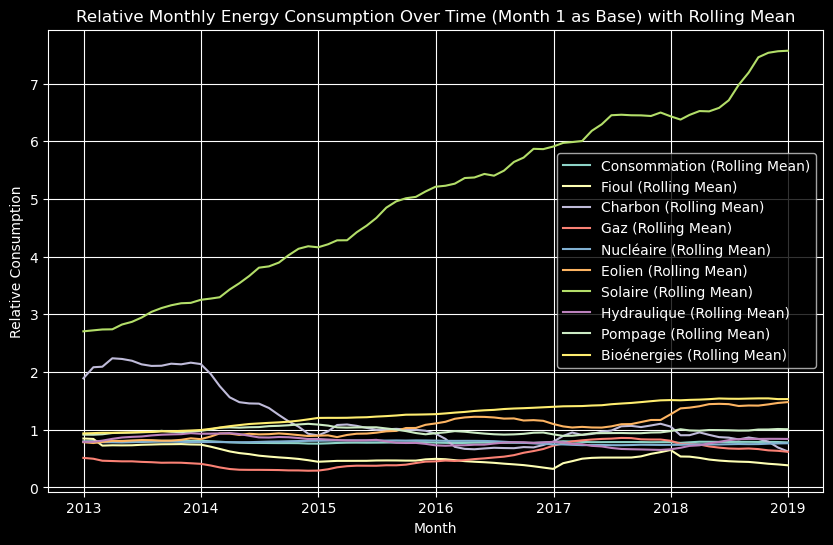

In [12]:
base_month_consumption = df_data_nationales_clean.iloc[0, :]
relative_consumption = df_data_nationales_clean.div(base_month_consumption)

plt.figure(figsize=(10, 6))

for source in relative_consumption.columns:
    rolling_mean = relative_consumption[source].rolling(window=12).mean()
    
    plt.plot(df_data_nationales_clean.index, rolling_mean, label=f'{source} (Rolling Mean)')

plt.title('Relative Monthly Energy Consumption Over Time (Month 1 as Base) with Rolling Mean')
plt.xlabel('Month')
plt.ylabel('Relative Consumption')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
base_month_consumption = df_data_nationales_clean.iloc[0, :]
relative_consumption = df_data_nationales_clean.div(base_month_consumption)

fig = px.line(relative_consumption, x=df_data_nationales_clean.index, y=relative_consumption.columns,
              labels={'index': 'Month', 'value': 'Relative Consumption'},
              title='Relative Monthly Energy Consumption Over Time (Month 1 as Base)',
              template='plotly_dark')

for source in relative_consumption.columns:
    rolling_mean = relative_consumption[source].rolling(window=12).mean()
    fig.add_scatter(x=df_data_nationales_clean.index, y=rolling_mean, mode='lines', name=f'{source} (Rolling Mean)')

fig.update_layout(xaxis_title='Month', yaxis_title='Relative Consumption(Year base=2013)', legend_title='Source')
fig.show()


In [14]:
#Normalisation: Option 1
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().set_output(transform="pandas")
# df_data_nationales_norm = scaler.fit_transform(df_data_nationales_clean)
# print(type(df_data_nationales_norm))
# df_data_nationales_norm

In [15]:
# #Normalisation: Option 2

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
df_data_nationales_norm_minmax = pd.DataFrame(scaler.fit_transform(df_data_nationales_clean), columns=df_data_nationales_clean.columns)


In [16]:
df_data_nationales_norm_minmax.index=df_data_nationales_clean.index

In [17]:
df_data_nationales_norm_minmax.columns

Index(['Consommation', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien',
       'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies'],
      dtype='object')

In [18]:
df_data_nationales_norm_minmax

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
DateTime,,,,,,,,,,
2012-01-31,0.760939,0.395978,0.264812,0.674385,0.942698,0.261843,0.000000,0.685342,0.485291,0.238350
2012-02-29,0.889888,1.000000,0.909174,0.842396,0.704414,0.120193,0.065022,0.429109,0.974199,0.112817
2012-03-31,0.463166,0.386935,0.514283,0.528641,0.641211,0.075655,0.163887,0.199038,0.922598,0.283511
2012-04-30,0.349394,0.299764,0.582241,0.180566,0.382192,0.256738,0.144519,0.439142,0.731803,0.000000
2012-05-31,0.162897,0.207607,0.295278,0.034463,0.148500,0.074804,0.234420,0.848024,0.396462,0.134298
...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.054940,0.018730,0.168125,0.256962,0.047438,0.206881,0.917987,0.200140,0.712480,0.873819
2018-09-30,0.065634,0.073612,0.112790,0.212430,0.209135,0.270474,0.802404,0.050706,0.471096,0.819937
2018-10-31,0.231794,0.213122,0.272168,0.397885,0.294363,0.538276,0.525221,0.030817,0.291420,0.780887


In [19]:
base_month_consumption = df_data_nationales_norm_minmax.iloc[0, :]
relative_consumption = df_data_nationales_norm_minmax.div(base_month_consumption)

fig = px.line(relative_consumption, x=df_data_nationales_norm_minmax.index, y=relative_consumption.columns,
              labels={'index': 'Month', 'value': 'Relative Consumption'},
              title='Relative Monthly Energy Consumption Over Time (Month 1 as Base)',
              template='plotly_dark')

for source in relative_consumption.columns:
    rolling_mean = relative_consumption[source].rolling(window=12).mean()
    fig.add_scatter(x=df_data_nationales_norm_minmax.index, y=rolling_mean, mode='lines', name=f'{source} (Rolling Mean)')

fig.update_layout(xaxis_title='Year', yaxis_title='Relative Consumption(Year base=2013)', legend_title='Source')
fig.show()


In [20]:
df_data_nationales_norm_minmax

,Consommation,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
DateTime,,,,,,,,,,
2012-01-31,0.760939,0.395978,0.264812,0.674385,0.942698,0.261843,0.000000,0.685342,0.485291,0.238350
2012-02-29,0.889888,1.000000,0.909174,0.842396,0.704414,0.120193,0.065022,0.429109,0.974199,0.112817
2012-03-31,0.463166,0.386935,0.514283,0.528641,0.641211,0.075655,0.163887,0.199038,0.922598,0.283511
2012-04-30,0.349394,0.299764,0.582241,0.180566,0.382192,0.256738,0.144519,0.439142,0.731803,0.000000
2012-05-31,0.162897,0.207607,0.295278,0.034463,0.148500,0.074804,0.234420,0.848024,0.396462,0.134298
...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.054940,0.018730,0.168125,0.256962,0.047438,0.206881,0.917987,0.200140,0.712480,0.873819
2018-09-30,0.065634,0.073612,0.112790,0.212430,0.209135,0.270474,0.802404,0.050706,0.471096,0.819937
2018-10-31,0.231794,0.213122,0.272168,0.397885,0.294363,0.538276,0.525221,0.030817,0.291420,0.780887


In [21]:
df2 = df_data_nationales_norm_minmax.drop('2012-01-31', axis=0)

In [22]:
base_month_consumption = df2.iloc[0, :]
relative_consumption = df2.div(base_month_consumption)

fig = px.line(relative_consumption, x=df2.index, y=relative_consumption.columns,
              labels={'index': 'Month', 'value': 'Relative Consumption'},
              title='Evolution of Energy Consumption in France (by source, 2013-2018)',
              template='plotly_dark')

for source in relative_consumption.columns:
    rolling_mean = relative_consumption[source].rolling(window=12).mean()
    fig.add_scatter(x=df2.index, y=rolling_mean, mode='lines', name=f'{source} (Rolling Mean)')

fig.update_layout(xaxis_title='Year', 
                  yaxis_title='Relative Consumption(Year base=2013)', 
                  legend_title='Source',
                  title_x=0.5)

fig.update_layout(
    annotations=[
        dict(
            text="Source: RTE",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.1,
            y=-0.25,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)


fig.show()



_______________________

In [57]:
df_data_nationales2 = df_data_nationales_clean.groupby(pd.Grouper(freq="Y")).mean()

In [58]:
df_data_nationales2 = (df_data_nationales2.dropna(how='all')
                                          .drop(['Consommation'], axis=1)
)

In [79]:
import plotly.express as px


latest_month_values = df_data_nationales2.iloc[-1, :]

pie_fig = px.pie(values=latest_month_values, names=latest_month_values.index,
                 title='Energy Consumption in France (by source, 2012-2018)',
                 template='plotly_dark',
                 )

pie_fig.update_layout(legend_title='Source')

pie_fig.update_layout(
    title_x=0.5,
    annotations=[
        dict(
            text="Source: RTE",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.1,
            y=-0.25,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)

pie_fig.show()


In [80]:
import plotly.express as px

latest_month_values = df_data_nationales2.iloc[-1, :]

# Use Set1 color palette
colors_set1 = px.colors.qualitative.Set1

pie_fig = px.pie(values=latest_month_values, names=latest_month_values.index,
                 title='Energy Consumption in France (by source, 2012-2018)',
                 template='plotly_dark',
                 color_discrete_sequence=colors_set1)

pie_fig.update_layout(legend_title='Source')

pie_fig.update_layout(
    title_x=0.5,
    annotations=[
        dict(
            text="Source: RTE",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.1,
            y=-0.25,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)

pie_fig.show()


In [83]:
import plotly.express as px

latest_month_values = df_data_nationales2.iloc[-1, :]

# Use Set3 color palette
colors_set3 = px.colors.qualitative.Set3

pie_fig = px.pie(values=latest_month_values, names=latest_month_values.index,
                 title='Energy Consumption in France (by source, 2012-2018)',
                 template='plotly_dark',
                 color_discrete_sequence=colors_set3)

pie_fig.update_layout(legend_title='Source')

pie_fig.update_layout(
    title_x=0.5,
    annotations=[
        dict(
            text="Source: RTE",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.1,
            y=-0.25,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)

pie_fig.show()
